In [9]:
from Clarans import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets


RND = 42

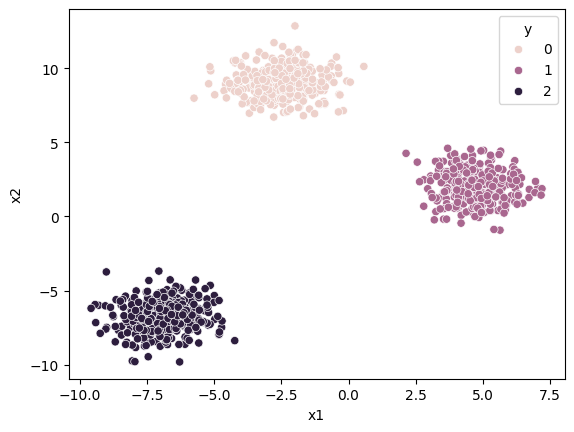

In [10]:
blobs = datasets.make_blobs(n_samples=1000, random_state=RND)
X, y = blobs[0], blobs[1]
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
sns.scatterplot(df, x='x1', y='x2', hue='y');

In [11]:
params = CLARANSConfig(num_k=3,
                       random_state=RND, 
                       y_col='y', 
                       verbose=False)

In [12]:
clarans = CLARANS(distance.euclidean, params)
clarans.train(df)

100%|██████████| 10/10 [00:29<00:00,  2.92s/it]


{269: array([-6.7912203 , -5.40257951]),
 165: array([-3.70050112,  9.67083974]),
 123: array([4.60032368, 2.65467038])}

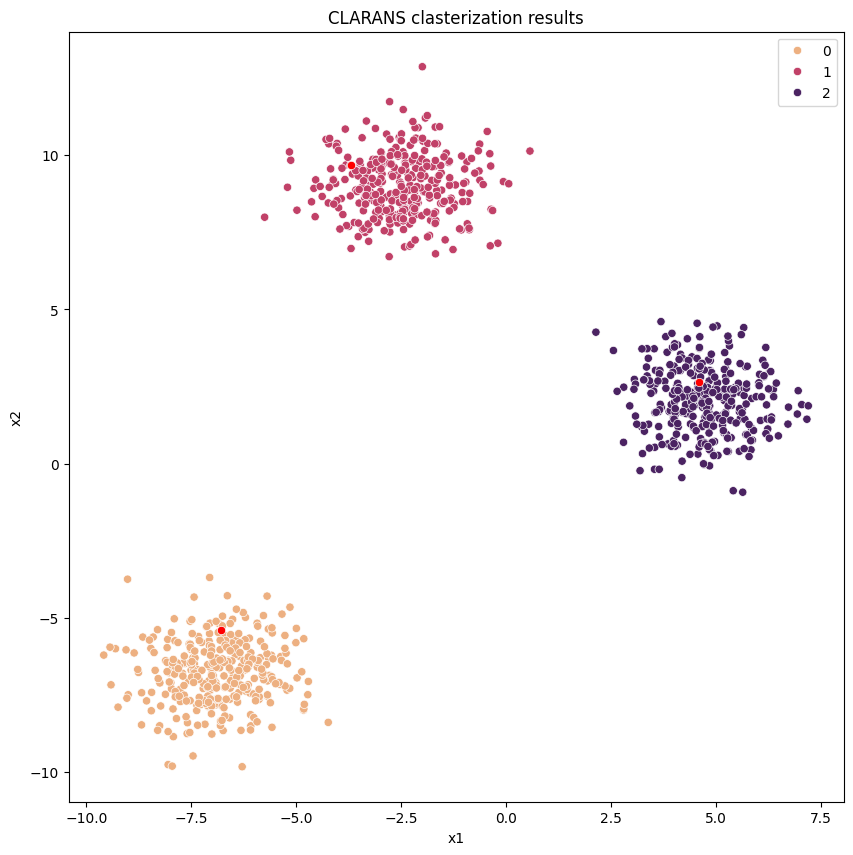

In [13]:
marked_df = clarans.predict(df)
solution = clarans.get_solution()
plt.figure(figsize=(10,10));
plt.title('CLARANS clasterization results')
sns.scatterplot(marked_df, x='x1', y='x2', hue='label', palette='flare');
sns.scatterplot(solution, x=0, y=1, color='r');